In [4]:
!pip install torch
!pip install datasets

In [7]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
     -------------------------------------- 262.1/262.1 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 9.6 MB/s eta 0:00:00


In [9]:
import pandas as pd
from random import shuffle
import multiprocessing
from multiprocessing import Pool
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\galla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
dataset = pd.read_csv('cleve-hung-fixed.csv')
dataset.shape

(597, 14)

In [14]:
!pip install matplotlib
!pip install numpy

     ---------------------------------------- 7.2/7.2 MB 17.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 19.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 8.6 MB/s eta 0:00:00


In [17]:
import matplotlib
import matplotlib.pyplot as pl
import numpy as np

try:
    from IPython import get_ipython
    get_ipython().run_line_magic('matplotlib', 'inline')
except AttributeError:
    print('Magic function can only be used in IPython environment')
    matplotlib.use('Agg')

pl.rcParams["figure.figsize"] = [15, 8]

In [19]:
!pip install seaborn


     -------------------------------------- 292.8/292.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 9.3 MB/s eta 0:00:00


In [20]:
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [117]:
df = pd.read_csv("fixed.cleveland.csv")


In [118]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (303, 14)


In [131]:
dg = pd.read_csv("fixed_data_join.csv")
print("The shape of dataset 2 is:", dg.shape)

The shape of dataset 2 is: (597, 14)


In [120]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3,0


In [132]:
dg.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [143]:
# Initial dataset

In [70]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(dict, index=["unique value count"]).transpose()

,unique value count
age,41
sex,2
cp,4
trtbps,50
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [72]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [121]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trtbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalachh,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


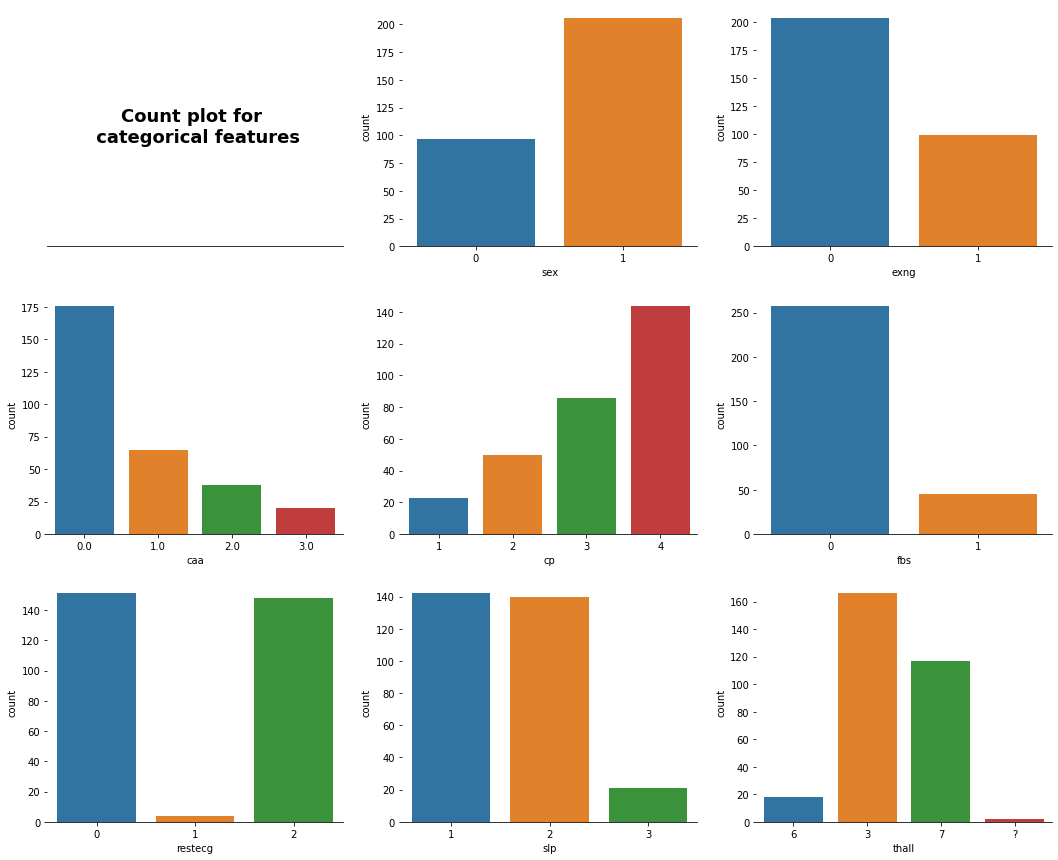

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Count plot for \n categorical features", 
         horizontalalignment='center', 
         verticalalignment='center',
        fontsize='18', fontweight='bold')


ax1 = fig.add_subplot(gs[0,1])
sns.countplot(data=df, x=cat_cols[0], ax=ax1)

ax2 = fig.add_subplot(gs[0,2])
sns.countplot(data=df, x=cat_cols[1], ax=ax2)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=df, x=cat_cols[2], ax=ax3)

ax4 = fig.add_subplot(gs[1,1])
sns.countplot(data=df, x=cat_cols[3], ax=ax4)

ax5 = fig.add_subplot(gs[1,2])
sns.countplot(data=df, x=cat_cols[4], ax=ax5)

ax6 = fig.add_subplot(gs[2,0])
sns.countplot(data=df, x=cat_cols[5], ax=ax6)

ax7 = fig.add_subplot(gs[2,1])
sns.countplot(data=df, x=cat_cols[6], ax=ax7)

ax8 = fig.add_subplot(gs[2,2])
sns.countplot(data=df, x=cat_cols[7], ax=ax8)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)


<AxesSubplot:xlabel='oldpeak'>

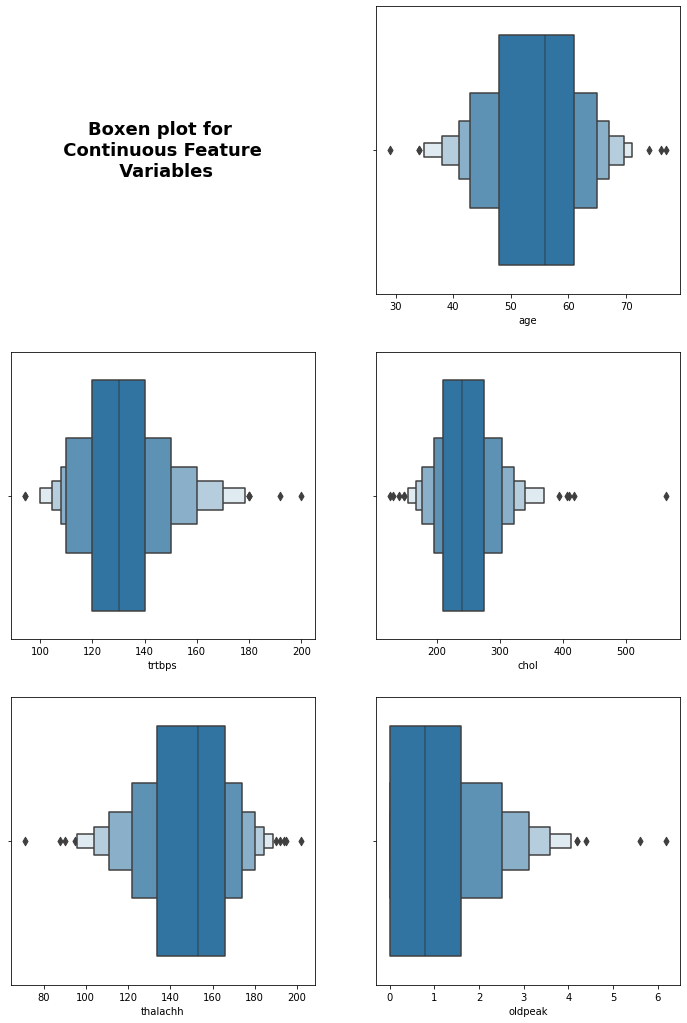

In [124]:
fig = plt.figure(figsize=(12, 18))
gs = fig.add_gridspec(3,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Boxen plot for \n Continuous Feature \n Variables",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold')

sns.boxenplot(ax=ax1, x=df[con_cols[0]])
sns.boxenplot(ax=ax2, x=df[con_cols[1]])
sns.boxenplot(ax=ax3, x=df[con_cols[2]])
sns.boxenplot(ax=ax4, x=df[con_cols[3]])
sns.boxenplot(ax=ax5, x=df[con_cols[4]])

In [125]:
df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.414446
trtbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
thalachh,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
exng,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510


<AxesSubplot:>

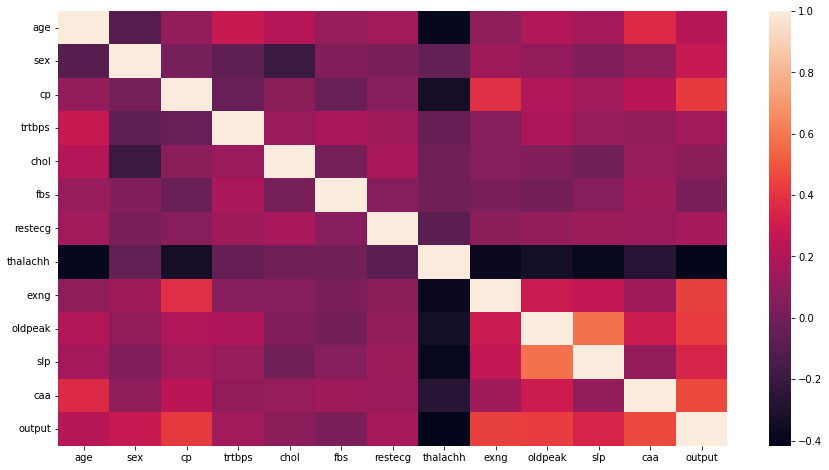

In [126]:
sns.heatmap(df.corr())

In [142]:
# Expanded data set

In [137]:
dict2 = {}
for col in dg.columns:
    dict2[col] = dg[col].value_counts().shape[0]
    
pd.DataFrame(dict2, index=["unique value count"]).transpose()

,unique value count
age,47
sex,2
cp,4
trtbps,54
chol,201
fbs,2
restecg,3
thalachh,103
exng,2
oldpeak,41


In [133]:
dg[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,597.0,51.182580,9.074366,28.0,44.0,52.0,58.00,77.0
trtbps,596.0,132.129195,17.603812,92.0,120.0,130.0,140.00,200.0
chol,574.0,248.655052,59.784805,85.0,211.0,242.5,278.75,603.0
thalachh,596.0,144.456376,23.794282,71.0,128.0,146.0,162.00,202.0
oldpeak,597.0,0.816248,1.067938,0.0,0.0,0.2,1.50,6.2


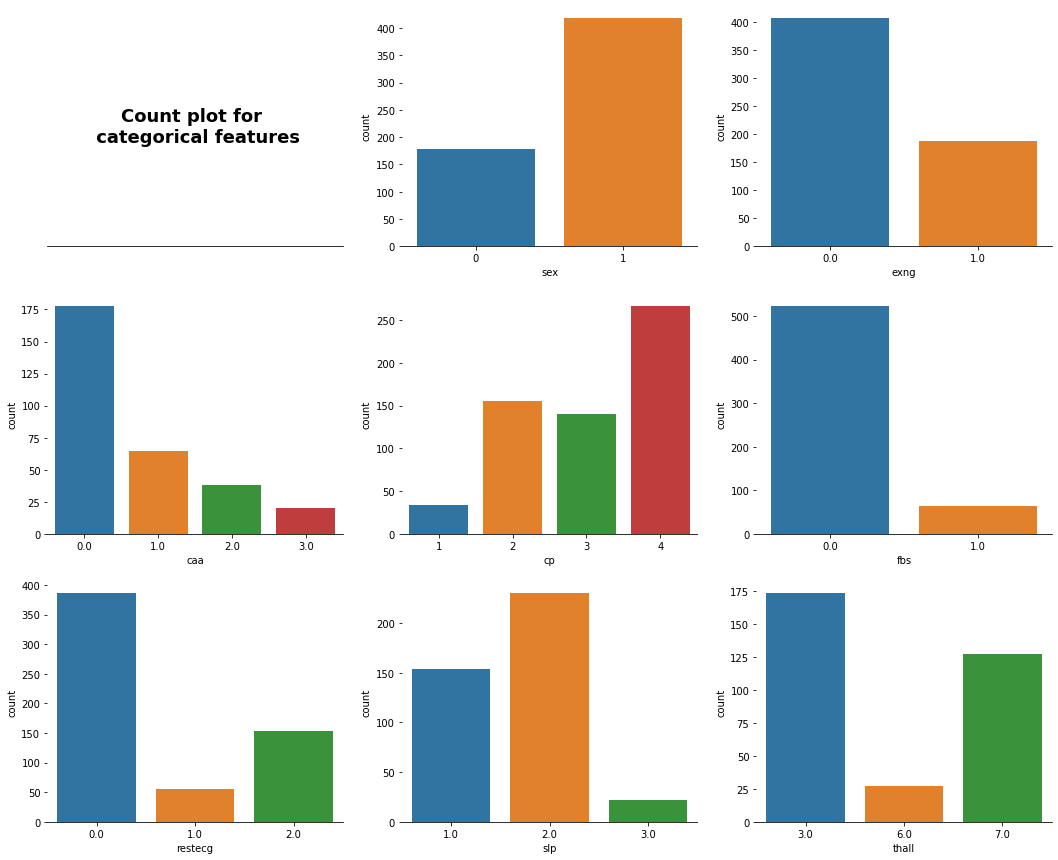

In [129]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Count plot for \n categorical features", 
         horizontalalignment='center', 
         verticalalignment='center',
        fontsize='18', fontweight='bold')


ax1 = fig.add_subplot(gs[0,1])
sns.countplot(data=dg, x=cat_cols[0], ax=ax1)

ax2 = fig.add_subplot(gs[0,2])
sns.countplot(data=dg, x=cat_cols[1], ax=ax2)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=dg, x=cat_cols[2], ax=ax3)

ax4 = fig.add_subplot(gs[1,1])
sns.countplot(data=dg, x=cat_cols[3], ax=ax4)

ax5 = fig.add_subplot(gs[1,2])
sns.countplot(data=dg, x=cat_cols[4], ax=ax5)

ax6 = fig.add_subplot(gs[2,0])
sns.countplot(data=dg, x=cat_cols[5], ax=ax6)

ax7 = fig.add_subplot(gs[2,1])
sns.countplot(data=dg, x=cat_cols[6], ax=ax7)

ax8 = fig.add_subplot(gs[2,2])
sns.countplot(data=dg, x=cat_cols[7], ax=ax8)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)


<AxesSubplot:xlabel='oldpeak'>

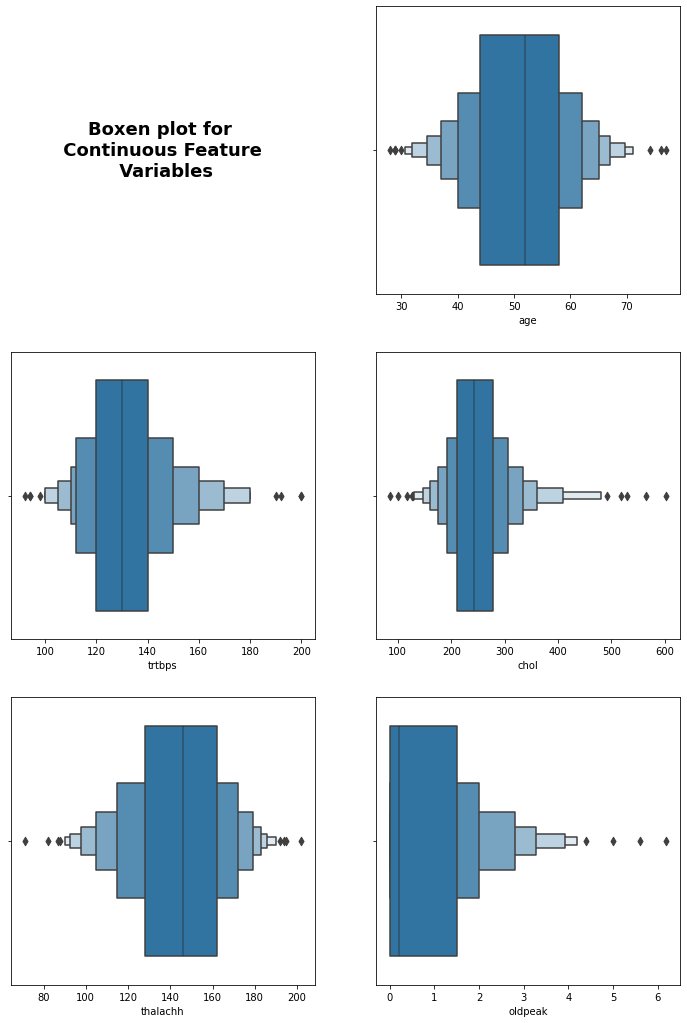

In [134]:
fig = plt.figure(figsize=(12, 18))
gs = fig.add_gridspec(3,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Boxen plot for \n Continuous Feature \n Variables",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold')

sns.boxenplot(ax=ax1, x=dg[con_cols[0]])
sns.boxenplot(ax=ax2, x=dg[con_cols[1]])
sns.boxenplot(ax=ax3, x=dg[con_cols[2]])
sns.boxenplot(ax=ax4, x=dg[con_cols[3]])
sns.boxenplot(ax=ax5, x=dg[con_cols[4]])

In [62]:
dg.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.062397,0.147064,0.238490,0.123624,0.176286,0.260132,-0.303596,0.155862,0.253305,0.079232,0.364598,0.106812,0.281259
sex,-0.062397,1.000000,0.120748,0.010620,-0.076399,0.038030,-0.034982,-0.088691,0.148814,0.095716,0.078211,0.089581,0.346885,0.195368
cp,0.147064,0.120748,1.000000,0.021586,0.104111,0.001428,0.073320,-0.322748,0.438328,0.277695,0.208264,0.232749,0.246774,0.405510
trtbps,0.238490,0.010620,0.021586,1.000000,0.105189,0.136097,0.077768,-0.117829,0.136658,0.185216,0.126301,0.097461,0.139050,0.126459
chol,0.123624,-0.076399,0.104111,0.105189,1.000000,0.054867,0.088498,-0.076064,0.117111,0.065998,0.049715,0.122894,0.014022,0.084646
fbs,0.176286,0.038030,0.001428,0.136097,0.054867,1.000000,0.111847,-0.005236,0.063431,0.050842,0.059488,0.147124,0.071545,0.111122
restecg,0.260132,-0.034982,0.073320,0.077768,0.088498,0.111847,1.000000,0.052515,0.071970,0.175329,0.033467,0.132462,-0.007699,0.260848
thalachh,-0.303596,-0.088691,-0.322748,-0.117829,-0.076064,-0.005236,0.052515,1.000000,-0.374642,-0.259880,-0.402584,-0.257282,-0.302712,-0.268015
exng,0.155862,0.148814,0.438328,0.136658,0.117111,0.063431,0.071970,-0.374642,1.000000,0.426849,0.331091,0.142967,0.318787,0.401383
oldpeak,0.253305,0.095716,0.277695,0.185216,0.065998,0.050842,0.175329,-0.259880,0.426849,1.000000,0.549925,0.296085,0.311476,0.522360


<AxesSubplot:>

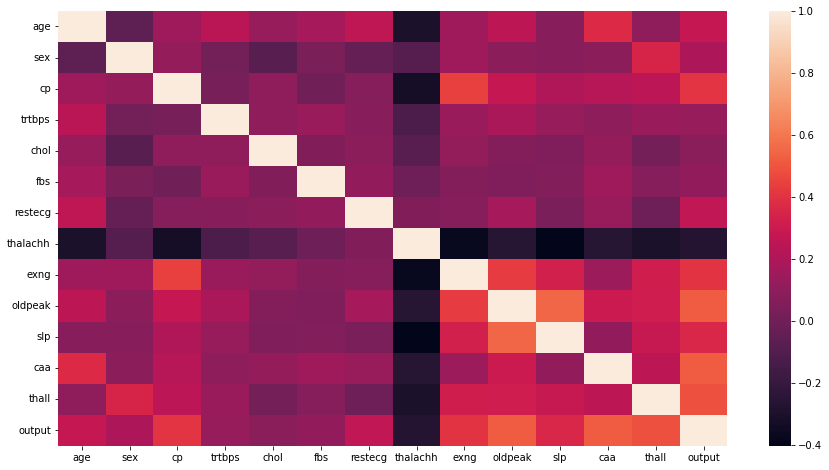

In [135]:
sns.heatmap(dg.corr())

In [78]:
df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,output
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trtbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalachh,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exng,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


<AxesSubplot:>

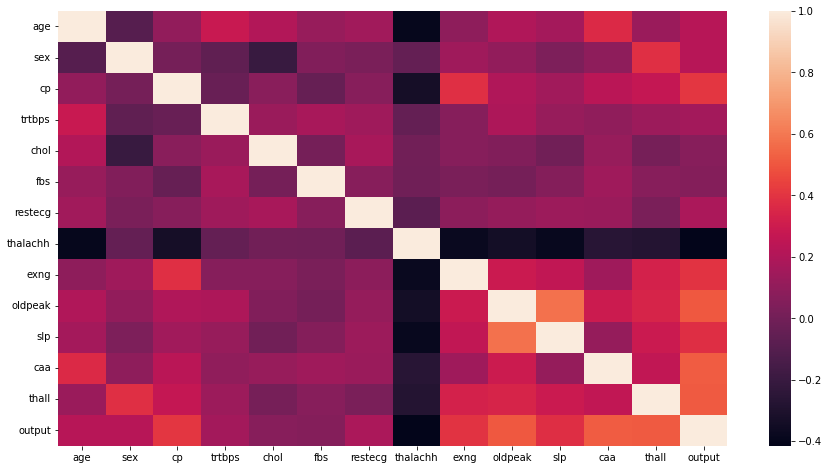

In [115]:
sns.heatmap(df.corr())


In [144]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 12.0 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
